#                                                 McDonald's USA 

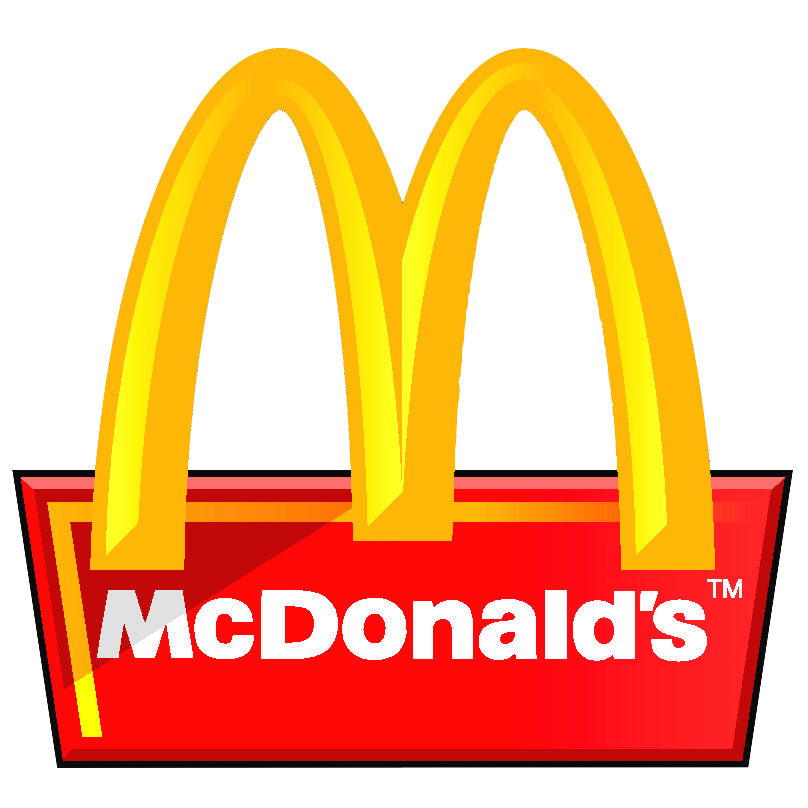

# McDonald Review Project

This dataset contains over 33,000 anonymized reviews of McDonald's stores in the United States, scraped from Google reviews. It provides valuable insights into customer experiences and opinions about various McDonald's locations across the country.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Potential Use Cases:

* Sentiment analysis: Analyze the sentiment of reviews to understand overall customer satisfaction and identify areas for improvement.
* Location-based analysis: Explore geographical patterns in reviews and ratings to identify high-performing or underperforming regions.

In [2]:
# Replace 'file_path' with the actual path to your file
data = pd.read_csv('McDonald_s_Reviews.csv', encoding='ISO-8859-1')

#### Short description of each column

* reviewer_id: Unique identifier for each reviewer (anonymized)
* store_name: Name of the McDonald's store
* category: Category or type of the store
* store_address: Address of the store
* latitude: Latitude coordinate of the store's location
* longitude: Longitude coordinate of the store's location
* rating_count: Number of ratings/reviews for the store
* review_time: Timestamp of the review
* review: Textual content of the review
* rating: Rating provided by the reviewer

<AxesSubplot:>

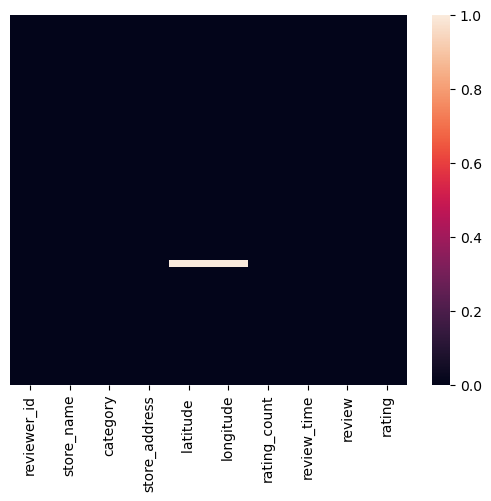

In [3]:
sns.heatmap(data.isnull(), yticklabels = False)

In [4]:
data.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [5]:
data.shape

(33396, 10)

In [6]:
missing = round(660 / 33396 * 100)
print(f'The percentage of missing data: {missing}%')

The percentage of missing data: 2%


In [7]:
data.dropna(inplace = True)

# dropna to drop the null values

<AxesSubplot:>

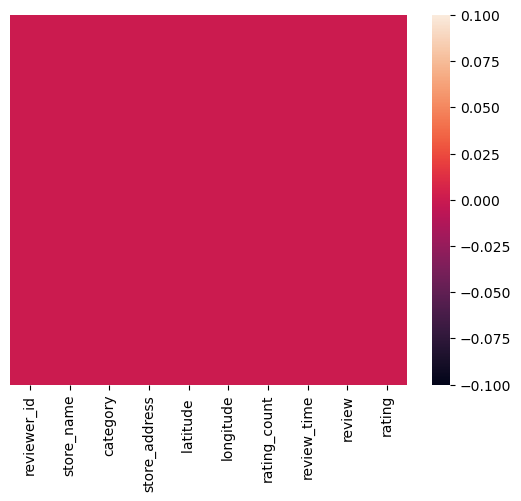

In [8]:
sns.heatmap(data.isnull(), yticklabels = False)

In [9]:
data.describe(include = object)

,store_name,category,store_address,rating_count,review_time,review,rating
count,32736,32736,32736,32736,32736,32736,32736
unique,2,1,39,50,39,21634,5
top,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...","2,810",4 years ago,Excellent,5 stars
freq,32667,32736,1890,1140,6633,2148,10059


##### Dealing with Rating colum

In [10]:
# Extract the numbers only from the column from i.e. '1 star', '4 stars' to numbers 1, 4
# Extract the numbers only from the 'rating' column

data['rating'] = data['rating'].str.extract(r'^(\d+)').astype(int)

In [11]:
dataset = data.copy()

##### Dealing with rating_count

In [12]:
# Extract the numbers only from the 'rating_count' column i.e., 1,240 as object to 1240 as int

# Remove non-numeric characters (e.g., comma) and convert to integer
data['rating_count'] = data['rating_count'].str.replace(',', '').str.extract(r'(\d+)').astype(int)

In [13]:
df = data.copy()

## Location-based analysis

#####  Extract State from store_address

In [14]:
# Assuming you have a DataFrame called 'data' with a 'store_address' column

# Define a regular expression pattern to match the state abbreviation or name
state_pattern = r',\s*([A-Za-z]{2}|[A-Za-z\s]+)\s+\d{5},'

# Extract the state information using the regular expression
data['state'] = data['store_address'].str.extract(state_pattern)

# If you want to remove leading/trailing whitespaces, you can use the str.strip() method
data['state'] = data['state'].str.strip()

# Display the DataFrame with the extracted 'state' column
print(data[['store_address', 'state']])

                                           store_address state
0      13749 US-183 Hwy, Austin, TX 78750, United States    TX
1      13749 US-183 Hwy, Austin, TX 78750, United States    TX
2      13749 US-183 Hwy, Austin, TX 78750, United States    TX
3      13749 US-183 Hwy, Austin, TX 78750, United States    TX
4      13749 US-183 Hwy, Austin, TX 78750, United States    TX
...                                                  ...   ...
33391  3501 Biscayne Blvd, Miami, FL 33137, United St...    FL
33392  3501 Biscayne Blvd, Miami, FL 33137, United St...    FL
33393  3501 Biscayne Blvd, Miami, FL 33137, United St...    FL
33394  3501 Biscayne Blvd, Miami, FL 33137, United St...    FL
33395  3501 Biscayne Blvd, Miami, FL 33137, United St...    FL

[32736 rows x 2 columns]


## Data Visualization

In [15]:
# Sort by ratings ascending
data_rate_desc = data['rating'].sort_values(ascending=False)

In [16]:
data['rating'].value_counts()

5    10059
1     9305
4     5646
3     4706
2     3020
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

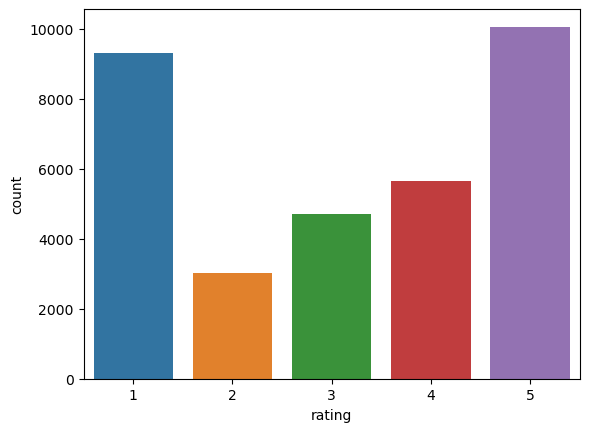

In [17]:
# count ratings 
sns.countplot(data=data, x = 'rating')

##### Identify high-performing or underperforming states

##### Customer ratings across states of the USA

In [18]:
# Sort by state ascending
data_state_desc = data['state'].sort_values(ascending=False)

In [19]:
data['state'].value_counts()

FL    8650
TX    6029
CA    5594
NY    5246
NJ    2233
NV    1030
PA    1028
UT     890
IL     751
DC     683
VA     602
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

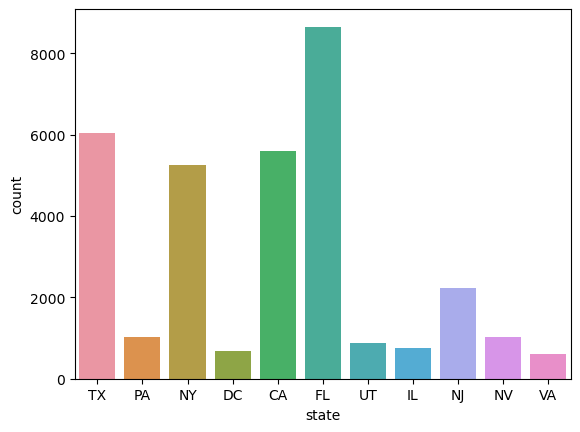

In [20]:
# count ratings 
sns.countplot(data=data, x = 'state')

In [21]:
data['max_rating_count'] = data['rating_count'] * data['rating']

<AxesSubplot:xlabel='state', ylabel='max_rating_count'>

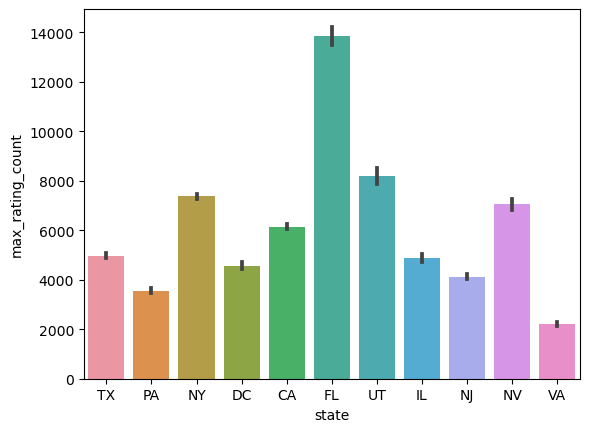

In [22]:
# count ratings 
sns.barplot(data=data, x = 'state', y = 'max_rating_count')

##### Frequency of the Ratings

<AxesSubplot:xlabel='state', ylabel='Percent'>

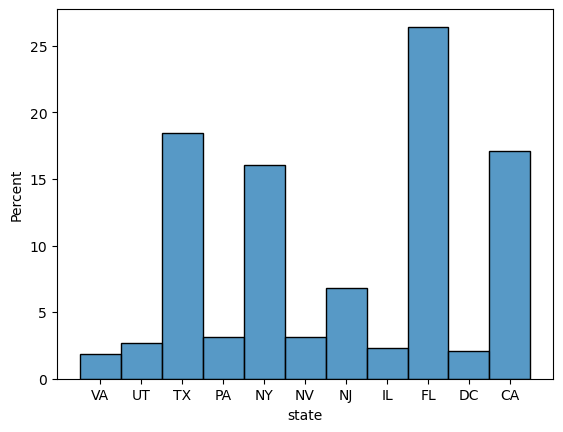

In [23]:
sns.histplot(data=data, x=data_state_desc, stat="percent", discrete=True)

<AxesSubplot:xlabel='state', ylabel='Count'>

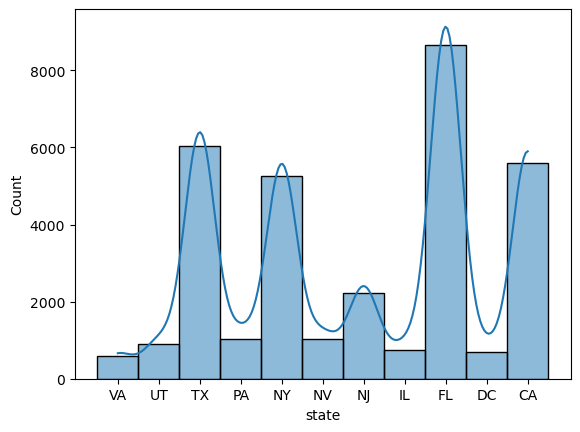

In [24]:
# frequencey of states
sns.histplot(data=data, x = data_state_desc, kde=True)

<AxesSubplot:xlabel='rating', ylabel='Percent'>

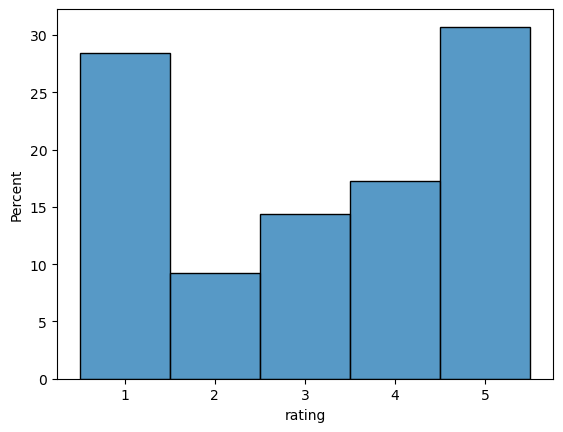

In [25]:
sns.histplot(data=data, x=data_rate_desc, stat="percent", discrete=True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

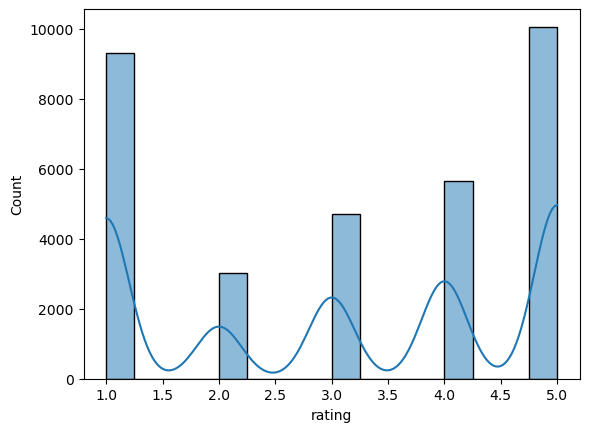

In [26]:
# frequencey of ratings
sns.histplot(data=data, x = data_rate_desc, kde=True)

In [27]:
dataset.drop(['reviewer_id', 'store_name', 'category', 'review_time', 'store_address'], axis=1, inplace=True)

In [28]:
# Drop reviewer_id, store_name, and category columns
data.drop(['reviewer_id', 'store_name', 'category', 'review_time', 'store_address'], axis=1, inplace=True)

## Data Preprocessing

* Independent variables: review
* Dependent variable: rating

### Bag of Words model
#### Vectorizer
* Corpus(review) 

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Assuming you have already loaded the dataset into 'data'
# Initialize the 'corpus' list
corpus = []

# Preprocess all reviews in the 'review' column
for review in data['review']:
    # Perform text preprocessing steps
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

# Initialize the TfidfVectorizer with desired parameters (if any)
tfidf_vectorizer = TfidfVectorizer(max_features=1500)

# Convert the corpus into a TF-IDF matrix
X = tfidf_vectorizer.fit_transform(corpus).toarray()
y = data['rating'].values

In [30]:
len(X[0])

1500

### Split into Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with the rest of your code using X_train, X_test, y_train, and y_test

## Classification model

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

# criterion = 'gini' = 66.6%, criterion = 'entropy' = 66.0%

RandomForestClassifier(n_estimators=5, random_state=0)

In [33]:
y_pred = classifier.predict(X_test)

## Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
accuracy_1 = accuracy_score(y_test, y_pred)*100
recall_1 = recall_score(y_test, y_pred, average='weighted')
precision_1 = precision_score(y_test, y_pred, average='weighted')
f1score_1 = f1_score(y_test, y_pred, average='weighted')

print(f'This is the model accuracy: {accuracy_1}%')
print('The precision of the model:', precision_1)
print('The recall of the model:', recall_1)
print('The f score of the model:', f1score_1)
print("="*53)
print("Classification Report:")
print("="*53)
print(classification_report(y_test, y_pred))

This is the model accuracy: 66.69211973121564%
The precision of the model: 0.6612457031728503
The recall of the model: 0.6669211973121564
The f score of the model: 0.6519258535572695
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.87      0.76      1861
           2       0.67      0.33      0.44       634
           3       0.58      0.46      0.51       922
           4       0.63      0.49      0.55      1113
           5       0.71      0.78      0.74      2018

    accuracy                           0.67      6548
   macro avg       0.65      0.59      0.60      6548
weighted avg       0.66      0.67      0.65      6548



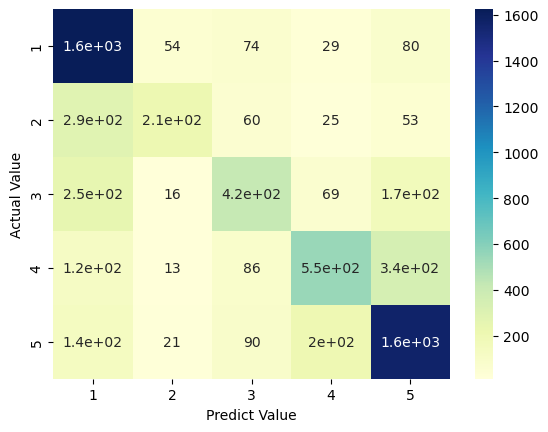

In [35]:
sns.heatmap(cm, annot = True, cmap = "YlGnBu",
           xticklabels=["1", "2", "3", "4", "5"],
           yticklabels=["1", "2", "3", "4", "5"])

plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

## Validation Machine

In [36]:
def predict_sentiment(review):
    review_vec = tfidf_vectorizer.transform([review])
    sentiment = classifier.predict(review_vec)
    return sentiment[0]

## Sampling test

In [37]:
new_review = "This restaurant has excellent service and delicious food."
customer_rating = predict_sentiment(new_review)
print("Predicted rank:", customer_rating)

Predicted rank: 5


In [38]:
new_review2 = "This restaurant sucks."
customer_rating = predict_sentiment(new_review2)
print("Predicted rank:", customer_rating)

Predicted rank: 5


In [39]:
new_review5 = "its bad"
customer_rating = predict_sentiment(new_review5)
print("Predicted rank:", customer_rating)

Predicted rank: 1


## Sentiment Analysis

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [41]:
# Performing sentiment analysis on each review
sentiments = []

for review in df['review']:
    sentiment = sia.polarity_scores(review)
    sentiments.append(sentiment)

In [42]:
sentiment_labels = []

for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [43]:
# Add the sentiment labels to the DataFrame
df['sentiment'] = sentiment_labels

In [44]:
df[['review', 'sentiment']]

,review,sentiment
0,Why does it look like someone spit on my food?...,Positive
1,It'd McDonalds. It is what it is as far as the...,Positive
2,Made a mobile order got to the speaker and che...,Negative
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,Neutral
4,"I repeat my order 3 times in the drive thru, a...",Negative
...,...,...
33391,They treated me very badly.,Negative
33392,The service is very good,Positive
33393,To remove hunger is enough,Negative
33394,"It's good, but lately it has become very expen...",Positive


### Split into Training set and Test set

In [45]:
X = df['review']
y = df['sentiment']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### TfidfVectorizer

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier
classsifier_Tfidf = RandomForestClassifier(n_estimators = 5, criterion = 'gini', random_state = 0)
classsifier_Tfidf.fit(X_train_vec, y_train)

# criterion = 'gini' = 66.6%, criterion = 'entropy' = 66.0%

RandomForestClassifier(n_estimators=5, random_state=0)

In [49]:
y_pred = classsifier_Tfidf.predict(X_test_vec)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
accuracy_2 = accuracy_score(y_test, y_pred)*100
recall_2 = recall_score(y_test, y_pred, average='weighted')
precision_2 = precision_score(y_test, y_pred, average='weighted')
f1score_2 = f1_score(y_test, y_pred, average='weighted')

print(f'This is the model accuracy: {accuracy_2}%')
print('The precision of the model:', precision_2)
print('The recall of the model:', recall_2)
print('The f score of the model:', f1score_2)
print("="*53)
print("Classification Report:")
print("="*53)
print(classification_report(y_test, y_pred))

This is the model accuracy: 81.35308491142334%
The precision of the model: 0.8148468946296953
The recall of the model: 0.8135308491142333
The f score of the model: 0.8139138872905027
Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.79      0.77      1927
     Neutral       0.76      0.73      0.75      1207
    Positive       0.87      0.85      0.86      3414

    accuracy                           0.81      6548
   macro avg       0.79      0.79      0.79      6548
weighted avg       0.81      0.81      0.81      6548



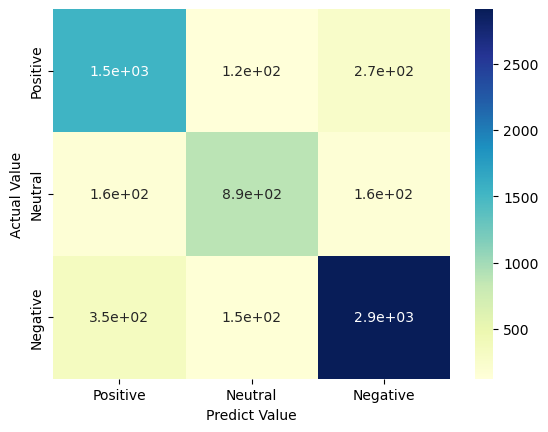

In [51]:
sns.heatmap(cm, annot = True, cmap = "YlGnBu",
           xticklabels=["Positive", "Neutral", "Negative"],
           yticklabels=["Positive", "Neutral", "Negative"])

plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

## Comparing Models

In [52]:
# Create a pandas DataFrame to organize the results
data = {
    'Model': ['Bag of Words', 'Sentiment Analysis'],
    'Accuracy': [accuracy_1, accuracy_2],
    'Recall': [recall_1, recall_2],
    'Precision': [precision_1, precision_2],
    'F1 Score': [f1score_1, f1score_2]
}

performance_df = pd.DataFrame(data)

In [53]:
performance_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Bag of Words,66.692120,0.666921,0.661246,0.651926
1,Sentiment Analysis,81.353085,0.813531,0.814847,0.813914


### Predicting machine

In [54]:
def predict_sentiment(review):
    review_vec = vectorizer.transform([review])
    sentiment = classsifier_Tfidf.predict(review_vec)
    return sentiment[0]

#### Sampling data

In [55]:
new_review = "This restaurant has excellent service and delicious food."
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Positive


In [56]:
new_review2 = "This restaurant sucks."
predicted_sentiment = predict_sentiment(new_review2)
print("predicted_sentiment:", predicted_sentiment)

predicted_sentiment: Negative
